In [1]:
import pandas as pd
import numpy as np
# %matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [2]:
#讀檔案

In [3]:
TW100 = pd.read_excel("TW100NMB.xlsx")#Taiwan100 Stock Price Data

In [4]:
TW100Y = pd.read_excel("TW100Y.xlsx")#預測KD用

In [5]:
X_Test = pd.read_excel("Test_X.xlsx")

In [6]:
Y_Test = pd.read_excel("Test_Y.xlsx")

In [7]:
#處理一下

In [8]:
TW100.shape

(34500, 17)

In [9]:
TW100Y.shape

(31500, 11)

In [10]:
X_Test.shape

(17250, 16)

In [11]:
Y_Test.shape

(15750, 9)

In [12]:
TW100NT = TW100.drop(["年月日","市值(百萬元)","當日均價(元)"] ,axis=1)

In [13]:
X_TestSP = X_Test.drop(["年月日","當日均價(元)"] ,axis=1)

In [14]:
X_Train_SP = TW100NT.values

In [15]:
X_Test_SP = X_TestSP.values 

In [16]:
L = [];

In [17]:
for j in range(0,34500,345):
    for i in range(315):
        a = X_Train_SP[(i+j):(i+j+30)];
        L.append(a);
    L

In [18]:
x_train = np.reshape(L,(31500,30,14,1))#X裡面沒放漲跌

In [19]:
type(x_train)

numpy.ndarray

In [20]:
M = []

In [21]:
for j in range(0,17250,345):
    for i in range(315):
        a = X_Test_SP[(i+j):(i+j+30)];
        M.append(a);
    M

In [22]:
x_test = np.reshape(M,(15750,30,14,1))

In [23]:
x_test.shape

(15750, 30, 14, 1)

In [24]:
type(x_test)

numpy.ndarray

In [25]:
#處理答案

In [26]:
TW100Y.head()

,7DaysRR,7DaysMAXP-30thCP,7DaysMAXP-1stOP,7DaysMINP-30thCP,7DaysMINP-1stOP,預測最大漲幅,預測最大跌幅,RSV,K值,D值,股價漲跌
0,1.084176,0.88,0.92,0.42,0.46,2.847416,-0.990405,0.907631,0.922902,0.892995,0.20
1,-0.520979,0.69,0.64,0.19,0.14,1.963793,-1.841056,1.000000,0.948601,0.911530,0.25
2,-0.343474,0.46,0.41,-0.09,-0.14,1.249238,-2.528946,0.895522,0.930908,0.917989,0.10
3,-0.477533,0.37,0.37,-0.18,-0.18,1.125989,-2.647596,0.536232,0.799349,0.878443,-0.30
4,-0.220389,0.60,0.47,0.09,-0.04,1.436430,-2.231051,0.616667,0.738455,0.831780,0.20


In [27]:
Y_train_7DRR = TW100Y["股價漲跌"]

In [28]:
y_train = Y_train_7DRR.values

In [29]:
Y_test_7DRR = Y_Test["股價漲跌"]

In [30]:
y_test = Y_test_7DRR.values

In [31]:
#看看答案

In [32]:
from scipy import stats

In [33]:
stats.describe(y_test)

DescribeResult(nobs=15750, minmax=(-11.5, 11.5), mean=0.020443174603174605, variance=0.57666916671796742, skewness=0.7628738158831643, kurtosis=32.31800203188507)

(array([   146.,    277.,    462.,   1123.,  11623.,  14211.,   1958.]),
 array([-5, -4, -3, -2, -1,  0,  1,  2]),
 <a list of 7 Patch objects>)

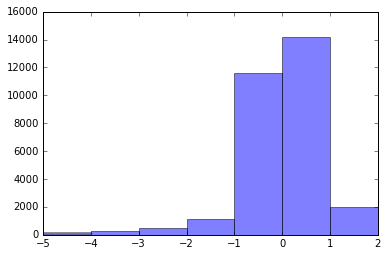

In [34]:
%matplotlib inline
#開始觀察資料決定區間
bins = np.arange(-5, 3, 1)
plt.hist(y_train, bins = bins, alpha = 0.5)

In [35]:
#Catogorize y_train
y_train[(y_train<0)] = -1
y_train[(y_train==0)] = 0
y_train[(y_train>0)] = 1

In [36]:
#Catogorize y_train
y_test[(y_test<0)] = -1
y_test[(y_test==0)] = 0
y_test[(y_test>0)] = 1

In [37]:
#將Ｙ轉換型態
from keras.utils import np_utils
y_train_trans = np_utils.to_categorical(y_train,3)
y_test_trans = np_utils.to_categorical(y_test,3)

Using TensorFlow backend.


### Build the model

In [38]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adadelta,SGD,Adam

In [39]:
model = Sequential()

In [40]:
model.add(Conv2D(10, (4, 4), padding='same', activation='relu', input_shape=(30,14,1)))
model.predict(x_test, batch_size=32, verbose=0)

array([[[[  0.        ,   0.        ,   2.11566973, ...,   3.32972813,
            4.328969  ,   2.44274831],
         [  0.        ,   0.        ,   0.        , ...,   0.69973207,
            1.00259233,   2.75380659],
         [  0.        ,   0.        ,   2.76142073, ...,   0.        ,
            0.        ,   1.24692726],
         ..., 
         [  0.        ,   0.        ,   0.        , ...,   3.3429215 ,
            3.81790066,   2.99975204],
         [  0.        ,   0.        ,   4.3668437 , ...,   0.69825435,
            0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   1.59370422]],

        [[  0.        ,   0.        ,   6.29489851, ...,   0.89832664,
            7.25492287,   0.        ],
         [  0.        ,   0.        ,   2.57182646, ...,   0.10512996,
            2.39589763,   0.        ],
         [  0.        ,   0.        ,   4.72685289, ...,   0.        ,
            0.        ,   0.    

In [41]:
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(20, (4, 4), padding='same', activation='relu'))
model.predict(x_test, batch_size=32, verbose=0)

array([[[[  0.00000000e+00,   0.00000000e+00,   2.00444341e+00, ...,
            8.62268150e-01,   0.00000000e+00,   0.00000000e+00],
         [  0.00000000e+00,   0.00000000e+00,   1.05265355e+00, ...,
            0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
         [  0.00000000e+00,   4.24281216e+00,   2.23538327e+00, ...,
            0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
         ..., 
         [  0.00000000e+00,   4.11123812e-01,   3.49485350e+00, ...,
            2.24132895e+00,   0.00000000e+00,   0.00000000e+00],
         [  0.00000000e+00,   0.00000000e+00,   5.29984951e-01, ...,
            2.72086954e+00,   0.00000000e+00,   0.00000000e+00],
         [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
            9.84373629e-01,   0.00000000e+00,   0.00000000e+00]],

        [[  0.00000000e+00,   0.00000000e+00,   2.68383241e+00, ...,
            4.23546195e-01,   0.00000000e+00,   0.00000000e+00],
         [  0.00000000e+00,   0.00000000e+00,

In [42]:
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(120, (4, 4), padding='same', activation='relu'))
model.predict(x_test, batch_size=32, verbose=0)

array([[[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.58000869,  0.        ],
         [ 0.30021375,  1.25639844,  0.57611376, ...,  0.        ,
           0.20197052,  0.        ],
         [ 0.40166143,  1.48775709,  0.        , ...,  0.05546724,
           0.83719504,  1.33609211]],

        [[ 0.        ,  0.30210787,  0.        , ...,  0.        ,
           1.00706339,  0.        ],
         [ 0.        ,  1.86329579,  0.        , ...,  0.        ,
           0.        ,  1.44908917],
         [ 0.52914518,  1.30363023,  0.        , ...,  0.        ,
           0.25643209,  2.22189116]],

        [[ 0.        ,  0.85190666,  0.        , ...,  0.04889701,
           0.45262823,  0.        ],
         [ 0.01447016,  2.2926023 ,  0.        , ...,  0.        ,
           0.        ,  1.24754798],
         [ 0.04320964,  1.70473218,  0.        , ...,  0.        ,
           0.2666744 ,  2.19180751]],

        ..., 
        [[ 0.        ,  0.15939277,  0.     

In [43]:
model.add(MaxPooling2D(pool_size=(2, 2)))
model.predict(x_test, batch_size=32, verbose=0)

array([[[[  3.00213754e-01,   1.86329579e+00,   5.76113760e-01, ...,
            0.00000000e+00,   1.00706339e+00,   1.44908917e+00]],

        [[  1.44701637e-02,   2.29260230e+00,   1.21911384e-01, ...,
            2.28748739e-01,   8.23840857e-01,   1.24754798e+00]],

        [[  1.37548268e-01,   2.39070129e+00,   3.57825100e-01, ...,
            3.68822664e-01,   8.95304084e-01,   1.90379345e+00]]],


       [[[  4.99129117e-01,   2.02134180e+00,   7.18074739e-01, ...,
            0.00000000e+00,   1.06448400e+00,   1.29961896e+00]],

        [[  0.00000000e+00,   2.32275081e+00,   9.67260674e-02, ...,
            3.17950010e-01,   6.84027851e-01,   1.32138324e+00]],

        [[  1.56679749e-01,   2.23399425e+00,   3.41789275e-01, ...,
            4.64941621e-01,   1.23381174e+00,   1.80505741e+00]]],


       [[[  1.39438853e-01,   2.01290631e+00,   3.38700086e-01, ...,
            0.00000000e+00,   9.48246419e-01,   1.22302961e+00]],

        [[  0.00000000e+00,   2.31246853e+00

In [44]:
model.add(Flatten())
model.predict(x_test, batch_size=32, verbose=0)

array([[ 0.30021375,  1.86329579,  0.57611376, ...,  0.36882266,
         0.89530408,  1.90379345],
       [ 0.49912912,  2.0213418 ,  0.71807474, ...,  0.46494162,
         1.23381174,  1.80505741],
       [ 0.13943885,  2.01290631,  0.33870009, ...,  0.44729581,
         1.17341828,  2.21650076],
       ..., 
       [ 0.28428152,  3.22711802,  1.00399745, ...,  0.86826855,
         1.73576188,  3.70771646],
       [ 0.32748604,  3.25185966,  0.95438659, ...,  0.87200898,
         1.73229253,  3.68977928],
       [ 0.33604017,  3.26031375,  0.90780109, ...,  0.86413878,
         1.73347831,  3.70570874]], dtype=float32)

In [45]:
model.add(Dense(200))
model.predict(x_test, batch_size=32, verbose=0)

array([[-1.03276873, -0.3561312 , -1.1455636 , ...,  0.66817957,
        -1.57154322,  0.61914575],
       [-1.23381114, -0.31987113, -1.02429152, ...,  0.31765682,
        -1.62402105,  0.84568089],
       [-1.17676151, -0.28136492, -1.02744186, ...,  0.56497896,
        -1.31831074,  0.72780508],
       ..., 
       [-1.56514621, -0.0247457 , -1.62838686, ...,  0.72968864,
        -3.23852491,  1.79206049],
       [-1.57384765, -0.04210126, -1.63492155, ...,  0.73428881,
        -3.24951458,  1.81300342],
       [-1.56968975, -0.01183212, -1.64202166, ...,  0.70779455,
        -3.24848676,  1.80803335]], dtype=float32)

In [46]:
model.add(Activation('relu'))
model.predict(x_test, batch_size=32, verbose=0)

array([[ 0.        ,  0.        ,  0.        , ...,  0.66817957,
         0.        ,  0.61914575],
       [ 0.        ,  0.        ,  0.        , ...,  0.31765682,
         0.        ,  0.84568089],
       [ 0.        ,  0.        ,  0.        , ...,  0.56497896,
         0.        ,  0.72780508],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.72968864,
         0.        ,  1.79206049],
       [ 0.        ,  0.        ,  0.        , ...,  0.73428881,
         0.        ,  1.81300342],
       [ 0.        ,  0.        ,  0.        , ...,  0.70779455,
         0.        ,  1.80803335]], dtype=float32)

In [47]:
model.add(Dense(y_train_trans.shape[1], activation='softmax'))
model.predict(x_test, batch_size=32, verbose=0)

array([[ 0.52457231,  0.44029403,  0.03513367],
       [ 0.66371137,  0.3119261 ,  0.02436259],
       [ 0.64783406,  0.32127354,  0.03089248],
       ..., 
       [ 0.76546824,  0.23002928,  0.00450254],
       [ 0.77684379,  0.21881658,  0.00433952],
       [ 0.77043068,  0.22500472,  0.00456453]], dtype=float32)

In [48]:
#model.compile(loss='categorical_crossentropy', optimizer=Adadelta(), metrics = ["accuracy"])

In [49]:
adam = Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss="mse",optimizer=adam, metrics=['accuracy'])
model.predict(x_test, batch_size=32, verbose=0)

array([[ 0.52457231,  0.44029403,  0.03513367],
       [ 0.66371137,  0.3119261 ,  0.02436259],
       [ 0.64783406,  0.32127354,  0.03089248],
       ..., 
       [ 0.76546824,  0.23002928,  0.00450254],
       [ 0.77684379,  0.21881658,  0.00433952],
       [ 0.77043068,  0.22500472,  0.00456453]], dtype=float32)

In [50]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 14, 10)        170       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 7, 10)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 7, 20)         3220      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 3, 20)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 3, 120)         38520     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 1, 120)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 360)               0         
__________

In [51]:
print(model.predict(x_test, batch_size=32, verbose=0))
model.fit(x_train, y_train_trans, epochs=1)

[[ 0.52457231  0.44029403  0.03513367]
 [ 0.66371137  0.3119261   0.02436259]
 [ 0.64783406  0.32127354  0.03089248]
 ..., 
 [ 0.76546824  0.23002928  0.00450254]
 [ 0.77684379  0.21881658  0.00433952]
 [ 0.77043068  0.22500472  0.00456453]]
Epoch 1/1
31500/31500 [==============================] - 13s 427us/step - loss: nan - acc: 0.1207


In [52]:
y_test_trans.shape

(15750, 3)

In [53]:
score = model.evaluate(x_test, y_test_trans)
score

15750/15750 [==============================] - 2s 148us/step


[nan, 0.10196825396825397]

In [54]:
pick = np.random.randint(1,15750, 20)

In [55]:
model.predict(x_test, batch_size=32, verbose=0)

array([[ nan,  nan,  nan],
       [ nan,  nan,  nan],
       [ nan,  nan,  nan],
       ..., 
       [ nan,  nan,  nan],
       [ nan,  nan,  nan],
       [ nan,  nan,  nan]], dtype=float32)

In [56]:
result = model.predict_classes(x_test)

In [57]:
result.shape

(15750,)

In [58]:
from ipywidgets import interact_manual

In [59]:
def identify(testnumber):
    print(testnumber);
    print("神經網路判斷為：",result[testnumber]);
    print("正確答案是:",y_test_trans[testnumber]);

In [60]:
interact_manual(identify, testnumber=(0,15449))

3071
神經網路判斷為： 0
正確答案是: [ 0.  0.  1.]
